In [1]:
import sys
sys.path.append('..')
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
def triangle(a, b, c, z):
    '''
    a : maximum point
    b, c : range of membership function
    z : input
    '''
    if z > a and z<= a+c:
        return 1-(z-a)/c
    elif z <=a and z>= a-b:
        return 1-(a-z)/b
    else : return 0
    
def trapezoidal(a, b, c, d, z):
    '''
    a : maximum point
    b, c : range of membership function
    z : input
    '''
    if z>= a-b and z < a:
        return 1-(a-z)/b
    elif z>=a and z<c:
        return 1
    elif z>=c and z<= c+d:
        return 1-(z-c)/d
    else : return 0
    
def Sigma(a, b, z):
    '''
    a : 1 point
    b : zero point
    '''
    if z>=a-b and z<=a:
        return 1-(a-z)/b
    elif z > a:
        return 1
    else : return 0

def s_shape(a, b, c, z):
    '''
    a : 0 point
    b : 0.5 point
    c : 1 point
    '''
    if z<a : return 0
    elif z>=a and z<=b:
        return 2*((z-a)/(c-a))**2
    elif z > b and z<=c:
        return 1-2*((z-c)/(c-a))**2
    else : return 1
    
def bell(b, c, z):
    '''
    b : 0.5 point
    c : center point
    '''
    if z<=c:
        return s_shape(c-b, (c-b)/2, c, z)
    else : 
        return 1- s_shape(c, (c+b)/2, c+b, z)

def gaussian(a, b, c, z):
    '''
    a : 1 point
    b : width of 0.607 values 
    c : zeor point
    '''
    if z>= a-c and z<= a+c:
        up = ((z-a)/(2*b))**2
        return np.exp(-up)
    else : return 0

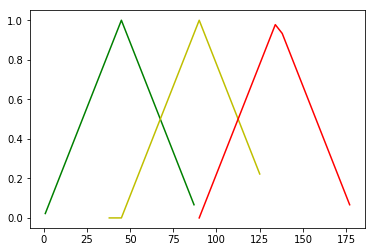

In [9]:
z = np.random.randint(0, 180, 180)
z.sort()
mu_tri1 = []
mu_tri2 = []
mu_tri3 = []
for i in z[:90]:
    mu_tri1.append(triangle(45, 45, 45, i))
for i in z[45:135]:
    mu_tri2.append(triangle(90, 45, 45, i))
for i in z[90:]:
    mu_tri3.append(triangle(135, 45, 45, i))


plt.plot(z[:90], mu_tri1, 'g-')
plt.plot(z[45:135], mu_tri2, 'y-')
plt.plot(z[90:], mu_tri3, 'r-')
plt.show()